# 概要
FontOCRの出力を分析する  
FontOCRの出力をもとにLegibilityを算出し、csvで書き出す

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Study/FOCR

/content/drive/MyDrive/Study/FOCR


In [ ]:
import os
import pandas as pd
import string
from tqdm import tqdm
from matplotlib import pyplot as plt

In [ ]:
SOFTMAX_CSV_DIR = os.path.join('FontOCR','output','softmax_upper_lower')
FONTNAME_FILE_PATH = os.path.join('fontname.txt')

In [ ]:
chars = string.ascii_lowercase + string.ascii_uppercase
font_names = [line.rstrip() for line in open(FONTNAME_FILE_PATH, 'r')]

In [ ]:
mult_index = pd.MultiIndex.from_product([font_names, list(chars)],
                                        names=["FontName", "ActualChar"])

In [ ]:
def extract_diagonal_component(df):
  acc_dict = {}
  for i in range(len(string.ascii_lowercase+string.ascii_uppercase)):
    acc_dict[string.ascii_lowercase[i]] = df.iloc[i, i%len(string.ascii_lowercase)]
    # acc_dict[string.ascii_lowercase[i]] = df.iloc[i, i]
  return acc_dict

In [ ]:
all_df = pd.DataFrame(index=[], columns=["FontName", "ActualChar", *list(chars)])
all_df = all_df.set_index(["FontName", "ActualChar"])

for font_name in tqdm(font_names[:]):
  csv_path = os.path.join(SOFTMAX_CSV_DIR, f'{font_name}.csv')
  df = pd.read_csv(csv_path)
  df = df.rename(columns={'Actual\\Pred':'ActualChar'})
  df['FontName'] = font_name
  df = df.set_index(["FontName", "ActualChar"])
  all_df = pd.concat([all_df, df])

100%|██████████| 1116/1116 [06:32<00:00,  2.84it/s]


In [ ]:
all_df

a             b             c  \
FontName       ActualChar                                             
ABeeZee-Italic a           9.924005e-01  6.209995e-10  1.271456e-08   
               b           7.843715e-10  9.999833e-01  4.748427e-09   
               c           7.010554e-05  1.030657e-06  9.991983e-01   
               d           4.916047e-07  2.775846e-06  1.294261e-08   
               e           2.981650e-09  1.088445e-09  4.788451e-09   
...                                 ...           ...           ...   
Zeyada         V           3.231898e-08  7.918174e-09  1.828659e-06   
               W           7.891528e-08  7.274639e-07  2.480657e-08   
               X           1.239000e-02  3.776964e-07  5.700265e-06   
               Y           4.753628e-10  1.981443e-08  1.214247e-07   
               Z           8.279737e-07  3.215994e-07  8.097863e-07   

                                      d             e             f  \
FontName       ActualChar                                             
ABeeZee-Italic a           3.712274e-07  1.245692e-08  1.365210e-09   
               b           5.803432e-07  6.451997e-08  1.318245e-07   
               c           3.040988e-06  6.733180e-05  1.212495e-06   
               d           9.999026e-01  9.070533e-10  5.629855e-09   
               e           3.260099e-10  9.999350e-01  8.601763e-09   
...                                 ...           ...           ...   
Zeyada         V           5.773557e-09  4.333593e-08  1.545623e-09   
               W           7.384743e-08  2.745836e-07  2.900369e-08   
               X           5.770107e-04  2.311898e-06  3.200684e-07   
               Y           9.665238e-09  2.205362e-09  1.862999e-08   
               Z           5.053267e-07  3.100168e-05  5.498706e-08   

                                      g             h             i  \
FontName       ActualChar                                             
ABeeZee-Italic a           5.909541e-08  8.958107e-08  5.842427e-09   
               b           1.084607e-07  5.491868e-06  9.468548e-10   
               c           6.248125e-05  9.525363e-07  1.876117e-06   
               d           9.671641e-10  4.705701e-07  6.904520e-08   
               e           1.393278e-07  1.100440e-09  7.646346e-10   
...                                 ...           ...           ...   
Zeyada         V           8.251866e-09  3.362558e-09  3.983203e-06   
               W           5.910099e-08  7.929592e-07  1.887868e-08   
               X           5.980133e-07  1.080547e-05  4.476039e-05   
               Y           2.075423e-07  6.221136e-07  4.058606e-08   
               Z           1.855958e-09  2.641813e-06  1.227408e-05   

                                      j  ...             Q             R  \
FontName       ActualChar                ...                               
ABeeZee-Italic a           1.255617e-09  ...  1.798930e-06  2.055959e-07   
               b           1.256901e-08  ...  1.459304e-10  1.056612e-11   
               c           9.285816e-07  ...  7.423448e-07  5.839490e-08   
               d           1.837355e-07  ...  1.092206e-08  5.133882e-08   
               e           2.628087e-09  ...  6.482396e-09  8.849643e-09   
...                                 ...  ...           ...           ...   
Zeyada         V           1.641030e-08  ...  3.048631e-09  3.045326e-08   
               W           6.313079e-06  ...  6.269618e-09  1.289842e-09   
               X           5.890635e-06  ...  7.331801e-07  2.805117e-06   
               Y           1.597516e-07  ...  5.026476e-06  9.541432e-10   
               Z           8.596631e-08  ...  2.186713e-08  7.883199e-06   

                                      S             T             U  \
FontName       ActualChar                                             
ABeeZee-Italic a           8.345348e-09  3.939996e-09  7.425770e-07   
               b           1.030426e-08  7.220454e-11  7.196837e

In [ ]:
all_df.to_csv(os.path.join(SOFTMAX_CSV_DIR,'all.csv'))

In [ ]:
all_df = pd.read_csv(os.path.join(SOFTMAX_CSV_DIR,'all.csv'))
all_df = all_df.set_index(["FontName", "ActualChar"])

In [ ]:
# all_df.xs('Arvo-BoldItalic', level=0).iloc[:, 0]

diagonal_component = extract_diagonal_component(all_df.xs('Arvo-BoldItalic', level=0))
worst_char = sorted(diagonal_component.items(), key=lambda x: x[1])[0][0]
print('worst_char:', worst_char)
all_df.xs('Arvo-BoldItalic', level=0).loc[worst_char, :]

worst_char: l


a    4.530752e-08
b    5.200786e-09
c    2.180900e-09
d    2.351184e-10
e    1.383192e-07
f    2.630909e-09
g    8.018081e-10
h    6.972458e-08
i    2.298378e-06
j    5.073928e-09
k    9.178212e-07
l    2.245256e-04
m    5.162111e-10
n    9.373108e-09
o    4.818080e-11
p    1.067384e-09
q    4.995748e-10
r    3.260442e-08
s    6.648976e-09
t    3.349112e-08
u    3.935903e-09
v    3.123918e-09
w    3.855786e-10
x    3.882436e-09
y    1.669480e-09
z    9.932603e-01
A    9.463461e-10
B    1.047072e-10
C    6.606102e-11
D    8.708617e-12
E    3.455284e-09
F    4.140024e-10
G    8.056616e-11
H    1.866016e-10
I    2.412522e-05
J    4.210249e-08
K    2.017623e-09
L    3.069689e-06
M    3.025966e-11
N    1.687597e-10
O    6.270799e-12
P    6.218933e-10
Q    1.538169e-11
R    2.111016e-10
S    1.756491e-10
T    7.360243e-11
U    1.388804e-10
V    9.885002e-11
W    3.093391e-11
X    4.576158e-11
Y    1.719419e-09
Z    6.484370e-03
Name: l, dtype: float64

In [ ]:
target_char = 'a'
mistake_target_char = 'A'
char_df = all_df.xs(target_char, level=1).loc[:,[mistake_target_char, target_char]]

In [ ]:
print('actual:',target_char)
char_df[char_df[mistake_target_char] >= 0.5]

actual: a


,A,a
FontName,,
AlegreyaSC-Black,0.905624,0.094365
AlegreyaSC-BlackItalic,0.671213,0.328763
AlegreyaSC-BoldItalic,0.649566,0.350429
AlegreyaSC-Italic,0.957446,0.042550
AlegreyaSC-Regular,0.749766,0.250232
Almendra-BoldItalic,0.854241,0.144473
AlmendraDisplay-Regular,0.582429,0.394345
AlmendraSC-BoldItalic,0.660617,0.339382
AlmendraSC-Regular,0.850372,0.149628


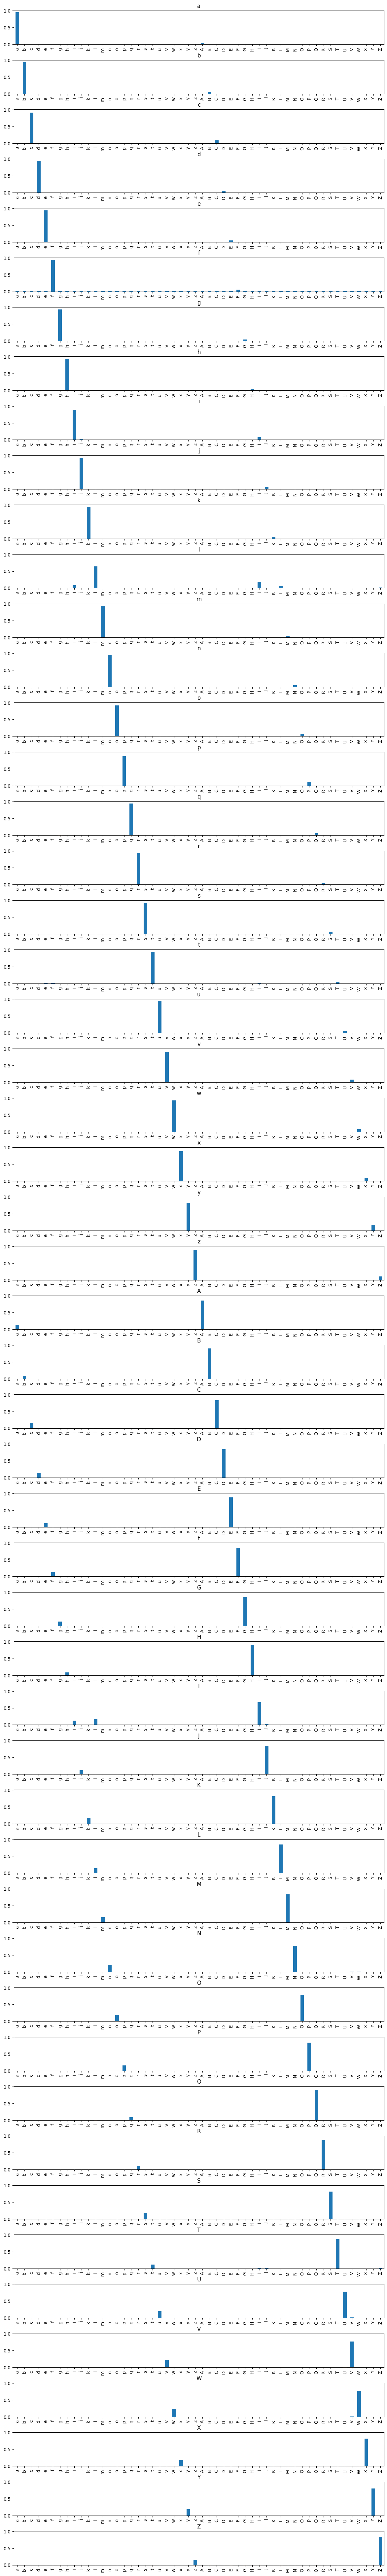

In [ ]:
fig, axes = plt.subplots(ncols=1, nrows=len(chars), figsize=(12, 1.5*len(chars)), sharex=False, sharey=True)
fig.tight_layout(pad=1.3)
for ax, char in zip(axes.ravel(), list(chars)):
    all_df.xs(char, level=1).mean().plot.bar(ax=ax, title=char)

In [ ]:
all_df.xs(font_names[0], level=0).iloc[1,1]

0.9999833106994628

In [ ]:
cols = ['FontName', 'Legibility', 'Legibility_min', 'Legibility_mean']
Legibility_df = pd.DataFrame(index=[], columns=cols)

for font_name in font_names:
  df = all_df.xs(font_name, level=0)
  acc_list = []
  for i, char in enumerate(string.ascii_lowercase+string.ascii_uppercase):
    acc_list.append(df.iloc[i, i])

  Legibility_min = sorted(acc_list)[0]
  Legibility_mean = sum(acc_list) / len(acc_list)
  record = pd.DataFrame([[font_name, Legibility_min, Legibility_min, Legibility_mean]], columns=Legibility_df.columns)
  Legibility_df = pd.concat([Legibility_df, record], ignore_index=True)


In [ ]:
Legibility_df

,FontName,Legibility,Legibility_min,Legibility_mean
0,ABeeZee-Italic,0.262339,0.262339,0.919572
1,ABeeZee-Regular,0.379592,0.379592,0.955078
2,Abel-Regular,0.380321,0.380321,0.859370
3,AbrilFatface-Regular,0.480657,0.480657,0.935051
4,Aclonica,0.451945,0.451945,0.905147
...,...,...,...,...
1111,YanoneKaffeesatz-Light,0.343408,0.343408,0.874634
1112,Yellowtail-Regular,0.024109,0.024109,0.939438
1113,YesevaOne-Regular,0.795598,0.795598,0.977664
1114,Yesteryear-Regular,0.001092,0.001092,0.880879


In [ ]:
print(Legibility_df['Legibility_min'].mean())
print(Legibility_df['Legibility_mean'].mean())

0.29551700047216944
0.8716641241001876


In [ ]:
Legibility_df['Legibility'].describe()

count    1.116000e+03
mean     2.955170e-01
std      2.876475e-01
min      6.320189e-10
25%      4.001727e-02
50%      2.287780e-01
75%      4.612048e-01
max      9.922469e-01
Name: Legibility, dtype: float64

<Axes: >

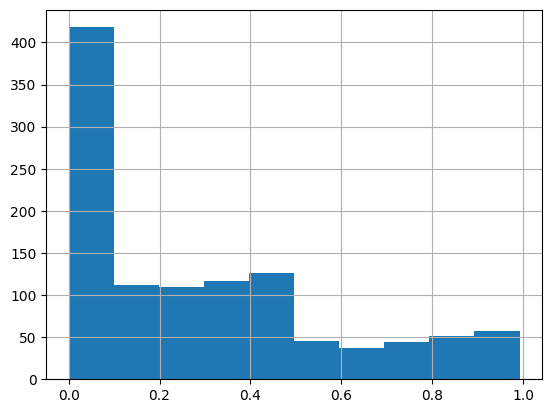

In [ ]:
Legibility_df['Legibility_min'].hist()

<Axes: >

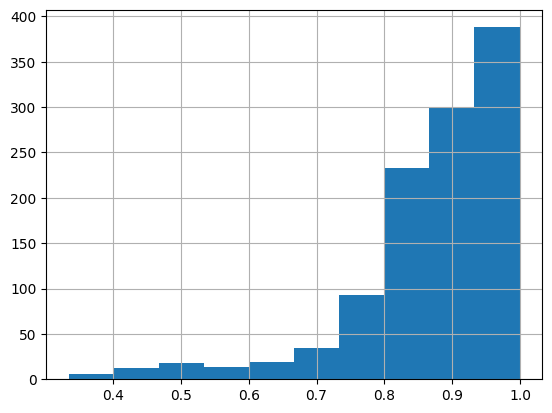

In [ ]:
Legibility_df['Legibility_mean'].hist()

In [ ]:
Legibility_df[Legibility_df['Legibility_mean'] < 0.5]

,FontName,Legibility,Legibility_min,Legibility_mean
55,AmaticSC-Bold,1.325850e-03,1.325850e-03,0.466817
56,AmaticSC-Regular,1.328196e-03,1.328196e-03,0.410561
136,Bangers,7.032283e-02,7.032283e-02,0.495809
156,BowlbyOneSC-Regular,9.594641e-03,9.594641e-03,0.473828
160,BrunoAceSC-Regular,3.982152e-02,3.982152e-02,0.487897
166,Butcherman-Regular,1.732383e-03,1.732383e-03,0.458187
181,CaesarDressing-Regular,5.283320e-03,5.283320e-03,0.463771
197,CarroisGothicSC-Regular,1.098298e-04,1.098298e-04,0.385609
233,Codystar-Light,2.036410e-03,2.036410e-03,0.410755
234,Codystar-Regular,8.778017e-03,8.778017e-03,0.472971


# Legibilityをcsvファイルに書き出す

In [ ]:
Legibility_df.to_csv(os.path.join(SOFTMAX_CSV_DIR, 'legibility.csv'))

In [ ]:
Legibility_df.sort_values('Legibility').head(20)

,FontName,Legibility
644,MrBedfort-Regular,6.320189e-10
742,OvertheRainbow,9.226329e-08
606,MeieScript-Regular,3.440760e-07
429,Hanalei-Regular,3.569129e-07
153,Bonbon-Regular,6.061669e-07
440,HomemadeApple,1.633494e-06
312,Eater-Regular,2.835818e-06
313,EaterCaps-Regular,2.835818e-06
332,Ewert-Regular,2.839510e-06
106,Astloch-Regular,3.034276e-06


# Legibilityの高いフォント

In [ ]:
Legibility_df.sort_values('Legibility', ascending=False).head(20)

,FontName,Legibility
292,Domine-Regular,0.992247
668,Neuton-Light,0.982069
576,Lusitana-Regular,0.981739
557,LindenHill-Regular,0.979980
113,Average-Regular,0.979594
330,Esteban-Regular,0.979465
427,Habibi-Regular,0.975133
367,Fenix-Regular,0.972106
165,Buenard-Regular,0.971008
472,JacquesFrancois-Regular,0.970763


## each Char softmax
フォント毎ではなくフォント毎+文字毎にlegibilityを設定する場合

In [ ]:
cols = ['FontName', 'Char', 'Legibility']
legibility_df = pd.DataFrame(index=[], columns=cols)

for font_name in font_names:
  each_char_legibility_df = pd.DataFrame(index=[], columns=cols)
  df = all_df.xs(font_name, level=0)
  acc_list = []
  for i, char in enumerate(string.ascii_lowercase):
    legibility = df.iloc[i, i]
    record = pd.DataFrame([[font_name, char, legibility]], columns=legibility_df.columns)
    each_char_legibility_df = pd.concat([each_char_legibility_df, record], ignore_index=True)
  for i, char in enumerate(string.ascii_uppercase):
    legibility = df.iloc[i, i]
    record = pd.DataFrame([[font_name, char, legibility]], columns=legibility_df.columns)
    each_char_legibility_df = pd.concat([each_char_legibility_df, record], ignore_index=True)

  legibility_df = pd.concat([legibility_df, each_char_legibility_df], ignore_index=True)

In [ ]:
legibility_df.tail(52)

,FontName,Char,Legibility
57980,Zeyada,a,0.999845
57981,Zeyada,b,0.998807
57982,Zeyada,c,0.997741
57983,Zeyada,d,0.998044
57984,Zeyada,e,0.997757
57985,Zeyada,f,0.000002
57986,Zeyada,g,0.999906
57987,Zeyada,h,0.504900
57988,Zeyada,i,0.999920
57989,Zeyada,j,0.986535


In [ ]:
legibility_df.to_csv(os.path.join(SOFTMAX_CSV_DIR, 'legibility_each_char_only_lower.csv'))

# Attr2Font Legible と FOCR Legibleの比較

In [ ]:
cd /content/drive/MyDrive/Study/gen_attr_file

/content/drive/MyDrive/Study/gen_attr_file


In [ ]:
base_attr_df = pd.read_csv('baseAttributes.csv')
worst_only_lower_df = pd.read_csv('softmax_worst_only_lower.csv', sep=' ')

In [ ]:
base_attr_df['legible']

0        89.24
1        89.24
2        89.24
3        89.24
4        89.24
         ...  
58027     1.00
58028     1.00
58029     1.00
58030     1.00
58031     1.00
Name: legible, Length: 58032, dtype: float64

In [ ]:
worst_only_lower_df['legible']

0        40.895715
1        40.895715
2        40.895715
3        40.895715
4        40.895715
           ...    
58027     0.000186
58028     0.000186
58029     0.000186
58030     0.000186
58031     0.000186
Name: legible, Length: 58032, dtype: float64

In [ ]:
base_attr_legible = base_attr_df['legible']
worst_only_lower_legible = worst_only_lower_df['legible']

In [ ]:
diff = base_attr_legible - worst_only_lower_legible

<Axes: >

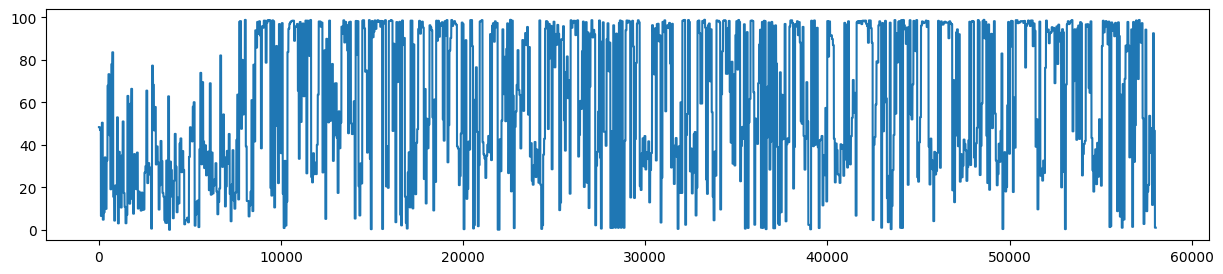

In [ ]:
diff.abs().plot(figsize=(15,3))